In [1]:
import pandas as pd
import numpy as np
import subprocess
import glob
import matplotlib.pyplot as plt

In [2]:
!cat ../../apal_reference_panel/stairway/apal_template.blueprint

#example blueprint file
#input setting
popid: TMPNAME # id of the population (no white space)
nseq: TMPNSAMPS # number of sequences
L: 236417819 # total number of observed nucleic sites, including polymorphic and monomorphic
whether_folded: true # whethr the SFS is folded (true or false)
SFS: TMPSFS
smallest_size_of_SFS_bin_used_for_estimation: 2 # default is 1; to ignore singletons, uncomment this line andchange this number to 2
#largest_size_of_SFS_bin_used_for_estimation: 29 # default is n-1; to ignore singletons, uncomment this line and change this number to nseq-2
pct_training: 0.67 # percentage of sites for training
mu: 0.000000028
year_per_generation: 35
nrand: 10	20	30	40
ninput: 200
plot_title: TMPNAME # title of the plot
xrange: 0.1,10000 # Time (1k year) range; format: xmin,xmax; "0,0" for default
yrange: 0,0 # Ne (1k individual) range; format: xmin,xmax; "0,0" for default
xspacing: 2 # X axis spacing
yspacing: 2 # Y axis spacing
fontsize: 12 # Font size
project_dir: /storag

In [34]:
%%bash
for mutgen in 5_2; do
    cp ../stairway/apal_template.blueprint ../stairway/apal_template_${mutgen}.blueprint
done

In [2]:
%%bash
source ~/.bashrc
conda activate easySFS
cd ../stairway
for i in fl cu; do
    for mutgen in 5_2; do
        NSAMPS=$( cat ../calls/${i}.1dsfs | cut -d" " -f2- | tr " " "\n" | grep -v "^0" | tr "\n" "\t" | awk '{print NF}' | sort -nu | tail -n 1 )
        SFS=$( cat ../calls/${i}.1dsfs | cut -d" " -f2- | tr " " "\n" | grep -v "^0" | tr "\n" "\t" | cut -f1-${NSAMPS} )
        mkdir -p ${i}
        NHAPS=$( echo "$((2*${NSAMPS}))" )
        sed "s/TMPNAME/${i}/g" apal_template_${mutgen}.blueprint \
            | sed "s/TMPSFS/${SFS}/g" \
            | sed "s/TMPNSAMPS/${NHAPS}/g" > ${i}_${mutgen}.blueprint
        java -cp /storage/group/ibb3/default/apal_reference_panel/stairway_plot_v2.1.1/stairway_plot_es Stairbuilder \
            ${i}_${mutgen}.blueprint
    done
done

File: fl_5_2.blueprint.sh created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/fl/input/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/fl/rand10/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/fl/rand20/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/fl/rand30/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/fl/rand40/ created
File: cu_5_2.blueprint.sh created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/cu/input/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/cu/rand10/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/cu/rand20/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/cu/rand30/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/cu/rand40/ created


In [3]:
%%bash
for mutgen in 5_2; do
    cp ../stairway/cu_${mutgen}.blueprint ../stairway/cu/cu_${mutgen}.blueprint
    cp ../stairway/fl_${mutgen}.blueprint ../stairway/fl/fl_${mutgen}.blueprint
done

In [4]:
%%bash
source ~/.bashrc
conda activate easySFS
cd ../stairway
for i in cu fl; do
    for mutgen in 5_2; do
        echo "#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --ntasks=8
#SBATCH --mem=32GB
#SBATCH --job-name=swplot

source ~/.bashrc
conda activate easySFS
cd /storage/group/ibb3/default/apal_reference_panel/stairway/
    " > ${i}_${mutgen}.blueprint.sbatch.sh
        cat ${i}_${mutgen}.blueprint.sh >> ${i}_${mutgen}.blueprint.sbatch.sh
    done
done

In [5]:
%%bash
cd ../stairway
for i in cu fl; do
    for mutgen in 5_2; do
        sbatch ${i}_${mutgen}.blueprint.sbatch.sh
    done
done

Submitted batch job 20172424
Submitted batch job 20172425


In [8]:
!cat ../stairway/slurm-20172424.out

Thu Sep  5 19:55:35 EDT 2024
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [8]:
summary = pd.read_csv("../stairway/fl/fl.final.summary", sep = "\t")

In [6]:
summary = pd.read_csv("../stairway/cu/cu.final.summary", sep = "\t")

In [3]:
import seaborn as sns

In [9]:
summary

,mutation_per_site,n_estimation,theta_per_site_median,theta_per_site_2.5%,theta_per_site_97.5%,year,Ne_median,Ne_2.5%,Ne_97.5%,Ne_12.5%,Ne_87.5%
0,1.000000e-09,200,0.001190,0.000242,0.004421,0.178571,10624.149940,2158.049669,39469.295500,5315.258807,27289.950239
1,1.698567e-07,200,0.001190,0.000242,0.004421,30.331553,10624.149940,2158.049669,39469.295500,5315.258807,27289.950239
2,1.929970e-07,200,0.001190,0.000242,0.004421,34.463752,10624.149940,2158.049669,39469.295500,5315.258807,27289.950239
3,1.929970e-07,200,0.001190,0.000242,0.004421,34.463752,10624.149940,2158.049669,39469.295500,5315.258807,27289.950239
4,2.176359e-07,200,0.001190,0.000242,0.004421,38.863559,10624.149940,2158.049669,39469.295500,5315.258807,27289.950239
...,...,...,...,...,...,...,...,...,...,...,...
11996,1.156311e-03,200,0.003747,0.002540,0.004234,206484.148212,33455.147766,22675.004142,37804.943133,26483.447124,36925.893517
11997,1.156311e-03,200,0.003747,0.002540,0.004234,206484.148212,33455.147766,22675.004142,37804.943133,26483.447124,36925.893517
11998,1.163026e-03,200,0.003747,0.002540,0.004234,207683.302893,33455.147766,22675.004142,37804.943133,26483.447124,36925.893517
11999,1.163026e-03,200,0.003747,0.002540,0.004234,207683.302893,33455.147766,22675.004142,37804.943133,26483.447124,36925.893517


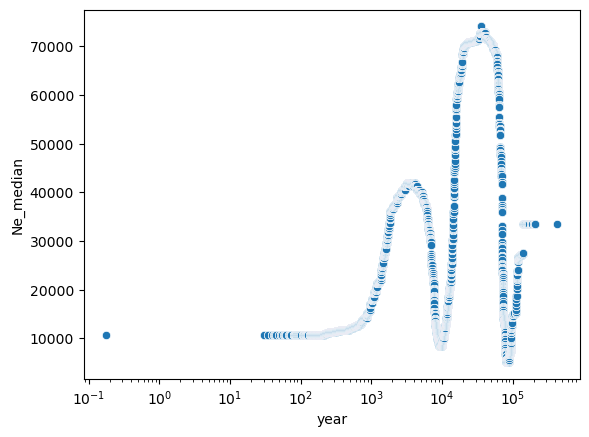

In [5]:
sns.scatterplot(data = summary, x = summary["year"], y = "Ne_median")
plt.xscale('log')

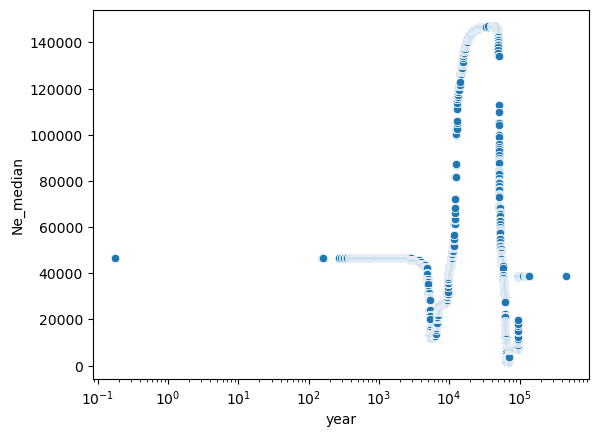

In [7]:
sns.scatterplot(data = summary, x = summary["year"], y = "Ne_median")
plt.xscale('log')

In [17]:
%%bash
source ~/.bashrc
conda activate ipyrad
bcftools query -l ../calls/apal_imputation_panel_unrelated_illumina_filtered_whatshap.vcf.gz \
    > ../easySFS_vcflist.txt

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [187]:
samplelist = pd.read_csv("../easySFS_vcflist.txt", header = None, names = ["Novogene_ID"])

In [188]:
samplelist = samplelist.merge(metadata[["Novogene_ID", "region"]], how = "left", on = "Novogene_ID")

In [189]:
sampleorder = pd.read_csv("~/scratch/ngsadmix.txt", header = None, names = ["Novogene_ID"])

In [190]:
struct = pd.read_csv("/storage/home/nsl5160/scratch/NGSadmix_4_1.qopt", sep = " ", header = None)
struct = pd.concat([sampleorder,struct], axis = 1)
struct = struct.round(5)

In [191]:
struct = struct.merge(metadata[["Novogene_ID", "region"]], how = "left", on = "Novogene_ID")

In [14]:
filelist = glob.glob("/storage/home/nsl5160/scratch/darpa/mapped/*.markdup.bam")

Florida-like:

In [193]:
clust1 = (struct["Novogene_ID"][struct["region"] == "Florida"]
    [struct[1] > 0.85][struct["Novogene_ID"].isin(samplelist["Novogene_ID"].tolist())]).tolist()

In [194]:
clust1 = pd.DataFrame(clust1, columns = ["Path"])
clust1["Path"] = "/storage/home/nsl5160/scratch/darpa/mapped/" + clust1["Path"] + ".markdup.bam"
clust1 = clust1[clust1["Path"].isin(filelist)].reset_index(drop=True)

In [196]:
clust1.to_csv("../calls/clust1_saf.txt", header = None, index = False)

Belize-like:

In [197]:
clust2 = (struct["Novogene_ID"][struct["region"] == "Florida"]
    [struct[0] > 0.85][struct["Novogene_ID"].isin(samplelist["Novogene_ID"].tolist())]).tolist()

In [198]:
clust2 = pd.DataFrame(clust2, columns = ["Path"])
clust2["Path"] = "/storage/home/nsl5160/scratch/darpa/mapped/" + clust2["Path"] + ".markdup.bam"
clust2 = clust2[clust2["Path"].isin(filelist)].reset_index(drop=True)

In [199]:
clust2.to_csv("../calls/clust2_saf.txt", header = None, index = False)

Curacao:

In [200]:
curacao = (struct["Novogene_ID"][struct["region"] == "Curacao"]
    [struct["Novogene_ID"].isin(samplelist["Novogene_ID"].tolist())]).tolist()

In [201]:
curacao = pd.DataFrame(curacao, columns = ["Path"])
curacao["Path"] = "/storage/home/nsl5160/scratch/darpa/mapped/" + curacao["Path"] + ".markdup.bam"
curacao = curacao[curacao["Path"].isin(filelist)].reset_index(drop=True)

In [202]:
curacao.to_csv("../calls/curacao_saf.txt", header = None, index = False)

All Florida:

In [23]:
florida = (metadata[metadata["region"] == "Florida"])

In [28]:
%%bash
source ~/.bashrc
conda activate ipyrad
bcftools query -l ../calls/apal_imputation_panel_unrelated_illumina_filtered_whatshap.vcf.gz > ../unrelated.txt

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [29]:
unrelated = pd.read_csv("../unrelated.txt", header = None, names = ["Novogene_ID"])

In [31]:
florida = (metadata["Novogene_ID"][metadata["region"] == "Florida"][metadata["Novogene_ID"].isin(unrelated["Novogene_ID"])]).tolist()
florida = pd.DataFrame(florida, columns = ["Path"])
florida["Path"] = "/storage/home/nsl5160/scratch/darpa/mapped/" + florida["Path"] + ".markdup.bam"
florida = florida[florida["Path"].isin(filelist)].reset_index(drop=True)

In [35]:
florida = florida.sample(30, random_state = 3)

In [36]:
florida.to_csv("../calls/florida_saf.txt", header = None, index = False)

Generating SAF input for stairway plot:

In [81]:
%%bash
source ~/.bashrc
conda activate ipyrad
cat ../references/apal_repeatmasked.bed \
    | grep "^Apal" | awk '{print $1"\t"$2+1"\t"$3}' > ../references/regions_list.txt
conda activate angsd
angsd sites index ../references/regions_list.txt

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: deactivate-gcc_linux-64.sh failed, see above for details


	-> Indexing ../references/regions_list.txt and will add '0' to pos column
	-> Filterfile: ../references/regions_list.txt supplied will generate binary representations... 
	-> Input file has 3 columns(bed), chr posStart posStop
	-> Writing chr:'Apal_hic_scaffold_1' 
	-> Writing chr:'Apal_hic_scaffold_2' 
	-> Writing chr:'Apal_hic_scaffold_3' 
	-> Writing chr:'Apal_hic_scaffold_4' 
	-> Writing chr:'Apal_hic_scaffold_5' 
	-> Writing chr:'Apal_hic_scaffold_6' 
	-> Writing chr:'Apal_hic_scaffold_7' 
	-> Writing chr:'Apal_hic_scaffold_8' 
	-> Writing chr:'Apal_hic_scaffold_9' 
	-> Writing chr:'Apal_hic_scaffold_10' 
	-> Writing chr:'Apal_hic_scaffold_11' 
	-> Writing chr:'Apal_hic_scaffold_12' 
	-> Writing chr:'Apal_hic_scaffold_13' 
	-> Writing chr:'Apal_hic_scaffold_14' 
	-> Writing chr:'Apal_hic_scaffold_15' 
	-> Writing chr:'Apal_hic_scaffold_16' 
	-> Writing chr:'Apal_hic_scaffold_17' 
	-> Writing chr:'Apal_hic_scaffold_18' 
	-> Writing chr:'Apal_hic_scaffold_19' 
	-> Writing chr:'Apal

	-> Writing chr:'Apal_hic_scaffold_198' 
	-> Writing chr:'Apal_hic_scaffold_199' 
	-> Writing chr:'Apal_hic_scaffold_200' 
	-> Writing chr:'Apal_hic_scaffold_201' 
	-> Writing chr:'Apal_hic_scaffold_202' 
	-> Writing chr:'Apal_hic_scaffold_203' 
	-> Writing chr:'Apal_hic_scaffold_204' 
	-> Writing chr:'Apal_hic_scaffold_205' 
	-> Writing chr:'Apal_hic_scaffold_206' 
	-> Writing chr:'Apal_hic_scaffold_207' 
	-> Writing chr:'Apal_hic_scaffold_208' 
	-> Writing chr:'Apal_hic_scaffold_209' 
	-> Writing chr:'Apal_hic_scaffold_210' 
	-> Writing chr:'Apal_hic_scaffold_211' 
	-> Writing chr:'Apal_hic_scaffold_212' 
	-> Writing chr:'Apal_hic_scaffold_213' 
	-> Writing chr:'Apal_hic_scaffold_214' 
	-> Writing chr:'Apal_hic_scaffold_215' 
	-> Writing chr:'Apal_hic_scaffold_216' 
	-> Writing chr:'Apal_hic_scaffold_217' 
	-> Writing chr:'Apal_hic_scaffold_218' 
	-> Writing chr:'Apal_hic_scaffold_219' 
	-> Writing chr:'Apal_hic_scaffold_220' 
	-> Writing chr:'Apal_hic_scaffold_221' 
	-> Writing chr:

	-> Writing chr:'Apal_Sc0a5M3_114_HRSCAF_208' 
	-> Writing chr:'Apal_Sc0a5M3_339_HRSCAF_589' 
	-> Writing chr:'Apal_Sc0a5M3_259_HRSCAF_428' 
	-> Writing chr:'Apal_Sc0a5M3_220_HRSCAF_369' 
	-> Writing chr:'Apal_Sc0a5M3_182_HRSCAF_319' 
	-> Writing chr:'Apal_Sc0a5M3_395_HRSCAF_727' 
	-> Writing chr:'Apal_Sc0a5M3_93_HRSCAF_170' 
	-> Writing chr:'Apal_Sc0a5M3_235_HRSCAF_396' 
	-> Writing chr:'Apal_Sc0a5M3_436_HRSCAF_819' 
	-> Writing chr:'Apal_Sc0a5M3_35_HRSCAF_62' 
	-> Writing chr:'Apal_Sc0a5M3_49_HRSCAF_84' 
	-> Writing chr:'Apal_Sc0a5M3_417_HRSCAF_786' 
	-> Writing chr:'Apal_Sc0a5M3_254_HRSCAF_419' 
	-> Writing chr:'Apal_Sc0a5M3_290_HRSCAF_477' 
	-> Writing chr:'Apal_Sc0a5M3_119_HRSCAF_215' 
	-> Writing chr:'Apal_Sc0a5M3_279_HRSCAF_462' 
	-> Writing chr:'Apal_Sc0a5M3_267_HRSCAF_437' 
	-> Writing chr:'Apal_Sc0a5M3_117_HRSCAF_213' 
	-> Writing chr:'Apal_Sc0a5M3_194_HRSCAF_335' 
	-> Writing chr:'Apal_Sc0a5M3_164_HRSCAF_291' 
	-> Writing chr:'Apal_Sc0a5M3_89_HRSCAF_161' 
	-> Writing chr:'Ap

In [11]:
bed = pd.read_csv("../references/apal_and_sym.bed", sep = "\t", header = None)
bed = bed[bed[0].str.contains("^Apal")]
bed = bed.sort_values(2, ascending = False).head(14).reset_index(drop=True)

In [49]:
nsamps = {"florida": 30, "curacao": 21}

In [52]:
for group in list(nsamps.keys()):
    for i in bed[0].tolist():
        task = "angsd_saf"
        mem = "64"
        cpus = "8"
        bamlist = "../calls/" + group + "_saf.txt"
        outpath = "~/scratch/"
        outprefix = group + "_" + i
        regions = i + ":"
        sitesfile = "../references/regions_list.txt"
        ninds = str(nsamps[group])
        ref = "../references/apal_and_sym.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             regions + " " + sitesfile + " " + ninds + " " + ref], shell=True)

Submitted batch job 11763930
Submitted batch job 11763931
Submitted batch job 11763932
Submitted batch job 11763933
Submitted batch job 11763934
Submitted batch job 11763935
Submitted batch job 11763936
Submitted batch job 11763937
Submitted batch job 11763938
Submitted batch job 11763939
Submitted batch job 11763940
Submitted batch job 11763941
Submitted batch job 11763942
Submitted batch job 11763943
Submitted batch job 11763944
Submitted batch job 11763945
Submitted batch job 11763946
Submitted batch job 11763947
Submitted batch job 11763948
Submitted batch job 11763949
Submitted batch job 11763950
Submitted batch job 11763951
Submitted batch job 11763952
Submitted batch job 11763953
Submitted batch job 11763954
Submitted batch job 11763955
Submitted batch job 11763956
Submitted batch job 11763957


In [57]:
%%bash
source ~/.bashrc
conda activate angsd
for i in curacao florida; do
    realSFS cat /storage/home/nsl5160/scratch/${i}_*.saf.idx \
        -P 8 -outnames ../calls/${i}
done

	-> This will cat together .saf files from angsd
	-> regions has to be disjoint between saf files. This WONT be checked (alot) !
	-> This has only been tested on safs for different chrs !
	 Examples:
		 'realSFS cat chr1.saf.idx chr2.saf.idx -outnames merged -P 10'
		 'realSFS cat -b file.list -outnames merged -P 10'
		 Possible options: -b file.list -P nThreads 
	-> outnames: '../calls/curacao' number of safs:14 nThreads: 8
	-> Number of threads: 8
	-> Setting threads to: 8 for both .saf.gz and saf.pos.gz
	-> Merging 0/14 
	-> Merging 1/14 
	-> Merging 2/14 
	-> Merging 3/14 
	-> Merging 4/14 
	-> Merging 5/14 
	-> Merging 6/14 
	-> Merging 7/14 
	-> Merging 8/14 
	-> Merging 9/14 
	-> Merging 10/14 
	-> Merging 11/14 
	-> Merging 12/14 
	-> Merging 13/14 
	-> This will cat together .saf files from angsd
	-> regions has to be disjoint between saf files. This WONT be checked (alot) !
	-> This has only been tested on safs for different chrs !
	 Examples:
		 'realSFS cat chr1.saf.idx chr

In [58]:
for group in ["curacao", "florida"]:
    task = "realsfs1d"
    mem = "64"
    cpus = "8"
    infile = "../calls/" + group + ".saf.idx"
    outprefix = "../calls/" + group
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         infile + " " + outprefix ], shell=True)

Submitted batch job 11765590
Submitted batch job 11765592


In [7]:
%%bash
for mutgen in 2_4 2_37 4_4 4_37; do
    cp ../stairway/apal_template.blueprint ../stairway/apal_template_${mutgen}.blueprint
done

In [16]:
%%bash
source ~/.bashrc
conda activate easySFS
cd ../stairway
for i in florida curacao; do
    for mutgen in 2_4 2_37 4_4 4_37; do
        NSAMPS=$( cat ../calls/${i}.1dsfs | cut -d" " -f2- | tr " " "\n" | grep -v "^0" | tr "\n" "\t" | awk '{print NF}' | sort -nu | tail -n 1 )
        SFS=$( cat ../calls/${i}.1dsfs | cut -d" " -f2- | tr " " "\n" | grep -v "^0" | tr "\n" "\t" | cut -f1-${NSAMPS} )
        mkdir -p ${i}
        NHAPS=$( echo "$((2*${NSAMPS}))" )
        sed "s/TMPNAME/${i}/g" apal_template_${mutgen}.blueprint \
            | sed "s/TMPSFS/${SFS}/g" \
            | sed "s/TMPNSAMPS/${NHAPS}/g" > ${i}_${mutgen}.blueprint
        java -cp /storage/group/ibb3/default/apal_reference_panel/stairway_plot_v2.1.1/stairway_plot_es Stairbuilder \
            ${i}_${mutgen}.blueprint
    done
done

File: florida_2_4.blueprint.sh created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_4/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_4/input/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_4/rand10/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_4/rand20/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_4/rand30/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_4/rand40/ created
File: florida_2_37.blueprint.sh created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_37/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_37/input/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/stairway/florida_2_37/rand10/ created
Directory: /storage/group/ibb3/default/apal_reference_panel/s

In [17]:
%%bash
for mutgen in 2_4 2_37 4_4 4_37; do
    cp ../stairway/curacao_${mutgen}.blueprint ../stairway/curacao/curacao_${mutgen}.blueprint
    cp ../stairway/florida_${mutgen}.blueprint ../stairway/florida/florida_${mutgen}.blueprint
done

In [18]:
%%bash
source ~/.bashrc
conda activate easySFS
cd ../stairway
for i in curacao florida; do
    for mutgen in 2_4 2_37 4_4 4_37; do
        echo "#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --ntasks=8
#SBATCH --mem=32GB
#SBATCH --job-name=swplot

source ~/.bashrc
conda activate easySFS
cd /storage/group/ibb3/default/apal_reference_panel/stairway/
    " > ${i}_${mutgen}.blueprint.sbatch.sh
        cat ${i}_${mutgen}.blueprint.sh >> ${i}_${mutgen}.blueprint.sbatch.sh
    done
done

In [19]:
%%bash
cd ../stairway
for i in curacao florida; do
    for mutgen in 2_4 2_37 4_4 4_37; do
        sbatch ${i}_${mutgen}.blueprint.sbatch.sh
    done
done

Submitted batch job 11790268
Submitted batch job 11790269
Submitted batch job 11790270
Submitted batch job 11790271
Submitted batch job 11790272
Submitted batch job 11790273
Submitted batch job 11790274
Submitted batch job 11790275


In [3]:
!cp /storage/home/nsl5160/scratch/curacao/curacao.final.summary.pdf ..

In [4]:
!cp /storage/home/nsl5160/scratch/clust1/clust1.final.summary.pdf ..

In [14]:
!ls -lh ~/scratch/curacao/rand30

total 1.6M
-rw-rw-r-- 1 nsl5160 nsl5160_collab 5.2K Mar 19 22:35 curacao-1.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 5.2K Mar 19 22:36 curacao-10.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 6.2K Mar 19 22:49 curacao-100.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 5.2K Mar 19 22:49 curacao-101.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 7.9K Mar 19 22:49 curacao-102.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 6.8K Mar 19 22:49 curacao-103.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 6.8K Mar 19 22:49 curacao-104.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 5.7K Mar 19 22:49 curacao-105.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 6.2K Mar 19 22:50 curacao-106.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 5.7K Mar 19 22:50 curacao-107.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 5.7K Mar 19 22:50 curacao-108.30_0.67.addTheta
-rw-rw-r-- 1 nsl5160 nsl5160_collab 5.7K Mar 19 22:50 curacao-109.30_0.67.addTh

In [8]:
!head /storage/home/nsl5160/scratch/clust1/final/clust1-95.40_0.67.addTheta

clust1	38	2.87196677E8	1	19
3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	



	60473.566859	25938.32842	18118.734446	14129.291299	13024.818565	9116.650942	8730.461398	7727.253962	6493.850022	6128.621889	5138.989514	5198.495872	5339.720681	5452.13926	5600.157298	5839.350905	5825.465687	6224.669858	15230.649027
fitness trail:
dim:	1	bestfit(testing):	4941.705933332443	bestfit(training):	9840.536605834961	2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38	1.9068228985896193E-4
dim:	2	bestfit(testing):	4876.248964309692	bestfit(training):	9689.9404296875	2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37	38	1.85847192803035E-4	9.374947727573237E-4
dim:	3	bestfit(testing):	4709.5466430187225	bestfit(training):	9341.943778038025	2	3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37	38	2.412577